In [2]:
import numpy as np

import matplotlib.pyplot as plt

In [4]:
T = 1.0 # end time

nx = 1000 # spacial size
x = np.linspace(0, 1, nx, endpoint=False)
hx = x[1] - x[0]
xx = np.linspace(0, 1, 1000, endpoint=False)

gamma = 0.95
ht = hx * gamma
nt = int(T/ht)

print(f'     T = {T}')
print(f'tsteps = {nt}')
print(f'    hx = {hx}')
print(f'    ht = {ht}')
print(f' gamma = {gamma}')

def pulse(x):
    return np.exp(-100*(x-0.5)**2)

def sinusoidal(x):
    k = 6
    return np.sin(k * np.pi * x)

def hump(x):
    u = np.zeros_like(x)
    I = np.where((x>=0.2) & (x<=0.4))[0]
    u[I] = -100 * (x[I]-0.2) * (x[I]-0.4)
    return u

def square(x):
    u = np.zeros(x.shape)
    u[np.where((x>0.4) & (x<0.6))[0]] = 1.0
    return u

uinit = square

     T = 1.0
tsteps = 1052
    hx = 0.001
    ht = 0.00095
 gamma = 0.95


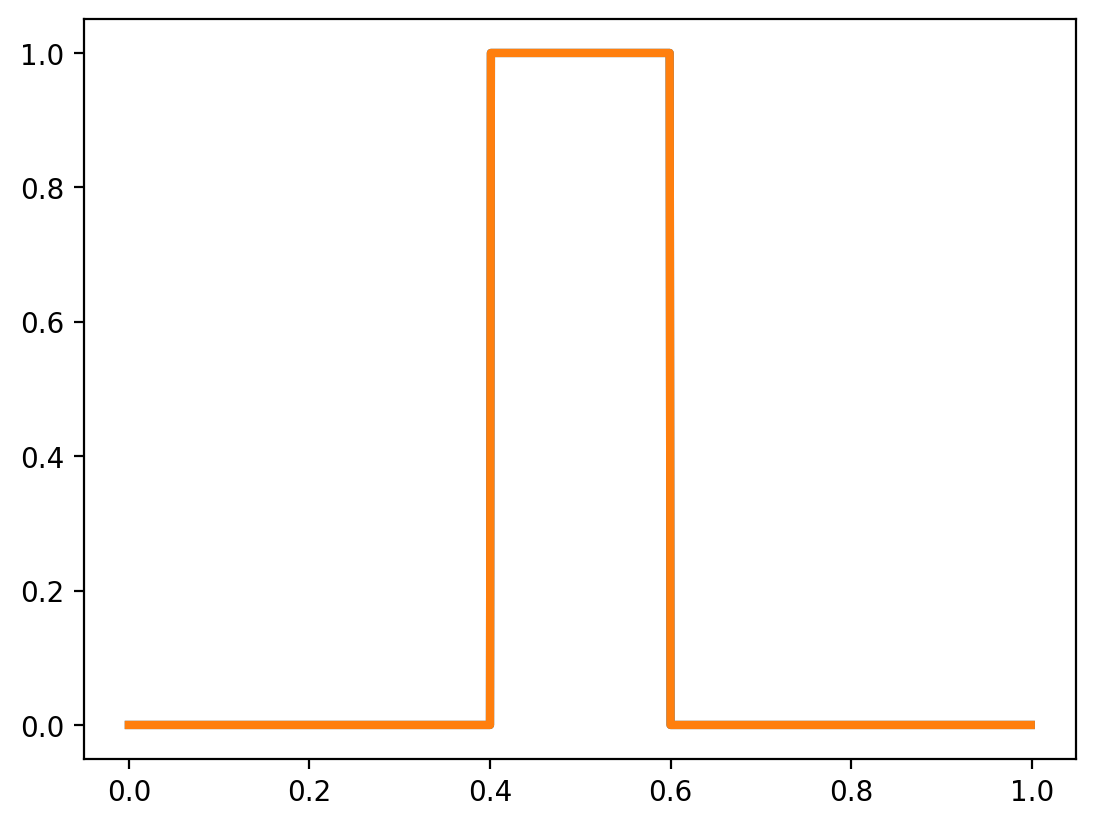

In [5]:
plt.plot(xx, uinit(xx), lw=3, clip_on=False)
plt.plot(x, uinit(x), lw=3, clip_on=False)

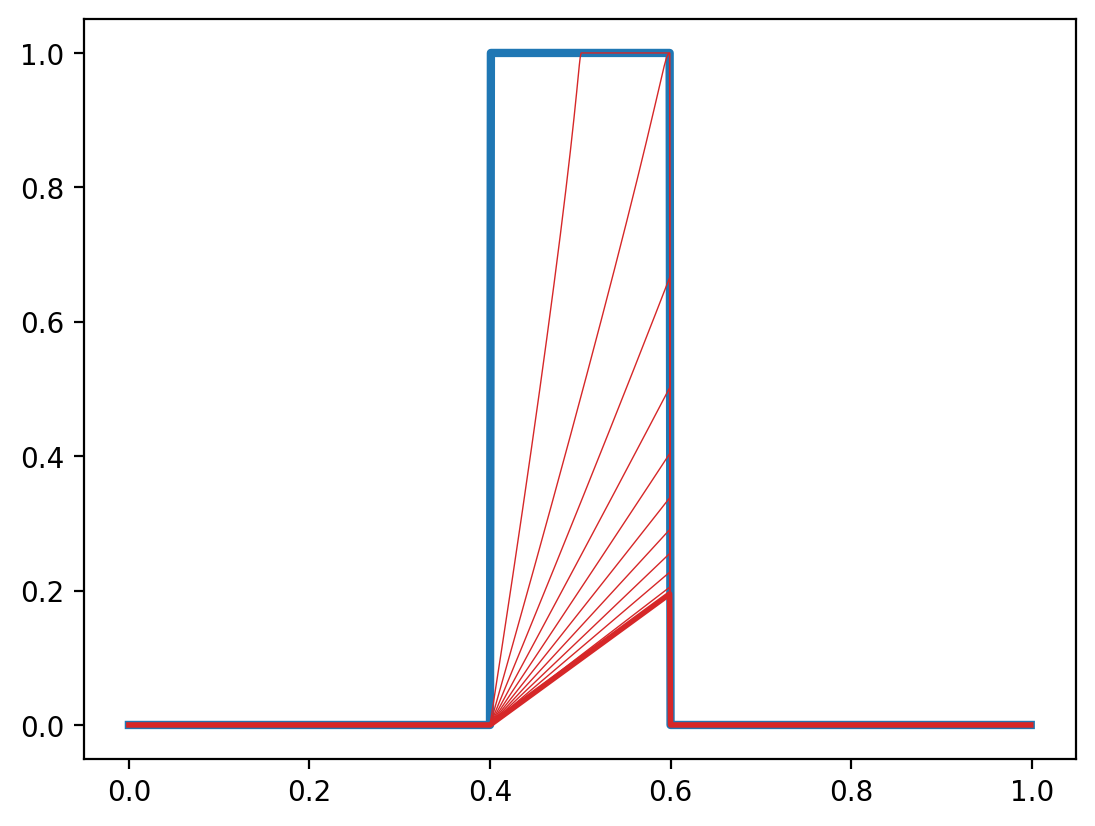

In [12]:
J = np.arange(0, nx)  # all vertices
Jm1 = np.roll(J, 1)
Jp1 = np.roll(J, -1)

u = uinit(x)
plt.plot(x, u, lw=3, color='tab:blue')
for tstep in range(1, nt+1):
    
    u[J] = u[J] - gamma * u[J] * (u[J] - u[Jm1])
    
    if tstep % 100 == 0:
        plt.plot(x, u, lw=0.5, color='tab:red')
    
plt.plot(x, u, color='tab:red', lw=2)